<a href="https://colab.research.google.com/github/zahraniayudyaa/TUGAS-ML/blob/main/ch_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Pengenalan Training Models**
---
Bab ini membahas cara kerja internal model machine learning, khususnya bagaimana model dilatih. Kita akan mempelajari:
* Linear Regression dengan persamaan normal
* Gradient Descent (Batch, Stochastic, Mini-batch)
* Polynomial Regression
* Model regularisasi (Ridge, Lasso, Elastic Net)
* Logistic Regression dan Softmax Regression

# **2. Linear Regression**
---
Linear Regression membuat prediksi dengan menjumlahkan fitur input yang diberi bobot, ditambah bias term.

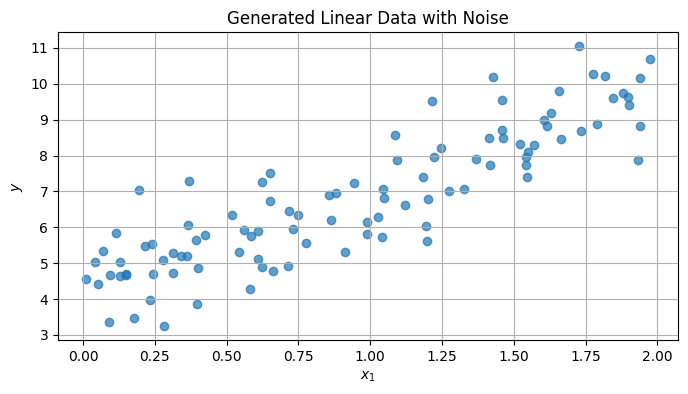

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate linear-looking data
np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.7)
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Generated Linear Data with Noise")
plt.grid(True)
plt.show()

# **3. Normal Equation**
---
Solusi bentuk tertutup untuk mencari parameter θ yang meminimalkan MSE.

Theta (from Normal Equation):
[[4.21509616]
 [2.77011339]]

Predictions for X_new = [0, 2]:
[[4.21509616]
 [9.75532293]]


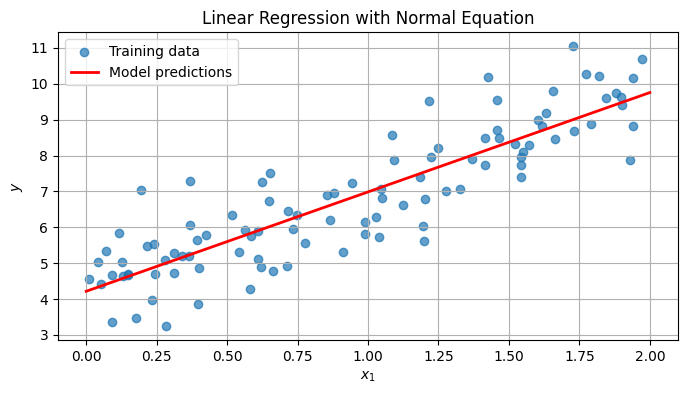

In [2]:
# Add x0 = 1 to each instance
X_b = np.c_[np.ones((m, 1)), X]

# Compute theta using Normal Equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta (from Normal Equation):")
print(theta_best)

# Make predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("\nPredictions for X_new = [0, 2]:")
print(y_predict)

# Plot the model's predictions
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.7, label="Training data")
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Model predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.title("Linear Regression with Normal Equation")
plt.grid(True)
plt.show()

# **4. Linear Regression dengan Scikit-Learn**
---

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept (theta0):", lin_reg.intercept_)
print("Coefficient (theta1):", lin_reg.coef_)
print("Predictions for X_new = [0, 2]:", lin_reg.predict(X_new))

Intercept (theta0): [4.21509616]
Coefficient (theta1): [[2.77011339]]
Predictions for X_new = [0, 2]: [[4.21509616]
 [9.75532293]]


# **5. Gradient Descent**
---
Algoritma optimisasi iteratif untuk meminimalkan fungsi biaya.

**Batch Gradient Descent** menggunakan seluruh dataset pada setiap langkah.

In [4]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

# Random initialization
theta = np.random.randn(2, 1)

# Batch Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta (from Batch GD):")
print(theta)

Theta (from Batch GD):
[[4.21509616]
 [2.77011339]]


# **6. Stochastic Gradient Descent**
---
Menggunakan satu instance acak pada setiap langkah.

In [5]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta (from Stochastic GD):")
print(theta)

Theta (from Stochastic GD):
[[4.18475289]
 [2.73036719]]


# **7. SGD dengan Scikit-Learn**
---

In [6]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

print("Intercept:", sgd_reg.intercept_)
print("Coefficient:", sgd_reg.coef_)

Intercept: [4.24365286]
Coefficient: [2.8250878]


# **8. Polynomial Regression**
---
Menggunakan model linear untuk data non-linear dengan menambahkan pangkat fitur.

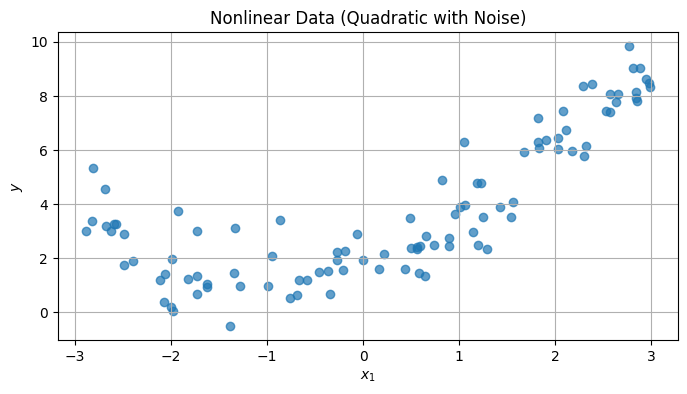

In [7]:
# Generate nonlinear data
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Plot the data
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.7)
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.title("Nonlinear Data (Quadratic with Noise)")
plt.grid(True)
plt.show()

# **9. Transformasi Polynomial**
---

Intercept: [1.8699327]
Coefficients: [[0.99763195 0.51104433]]


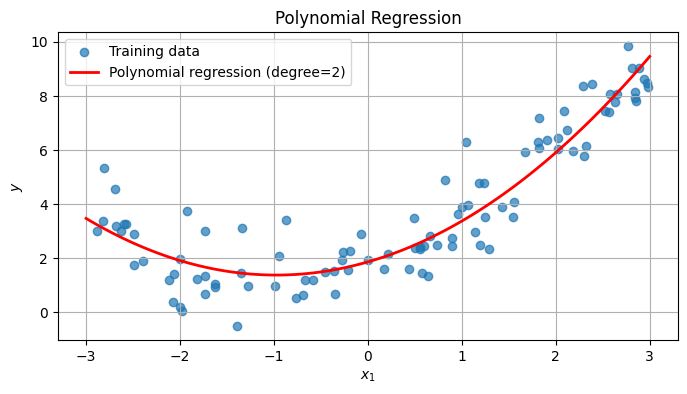

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Add polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train linear regression on polynomial features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print("Intercept:", lin_reg.intercept_)
print("Coefficients:", lin_reg.coef_)

# Make predictions
X_new = np.linspace(-3, 3, 100).reshape(-1, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

# Plot
plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.7, label="Training data")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Polynomial regression (degree=2)")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.legend()
plt.title("Polynomial Regression")
plt.grid(True)
plt.show()

# **10. Learning Curves**
---
Plot performa model terhadap ukuran training set.

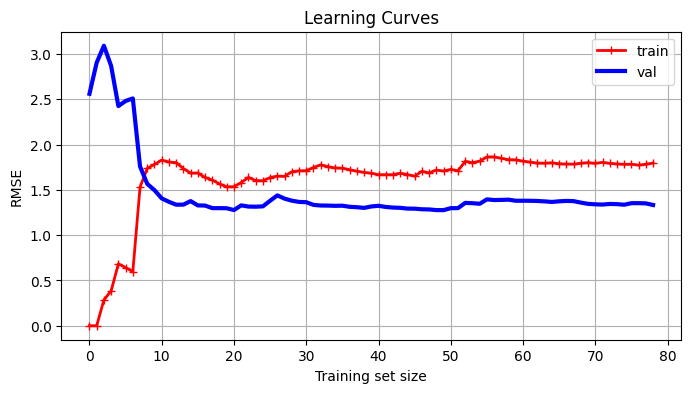

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []

    for m_train in range(1, len(X_train)):
        model.fit(X_train[:m_train], y_train[:m_train])
        y_train_predict = model.predict(X_train[:m_train])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m_train], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(8, 4))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("Learning Curves")
    plt.grid(True)
    plt.show()

# Linear regression learning curves
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

# **11. Ridge Regression (L2 Regularization)**
---
Menambahkan regularization term αΣθᵢ² ke fungsi biaya.

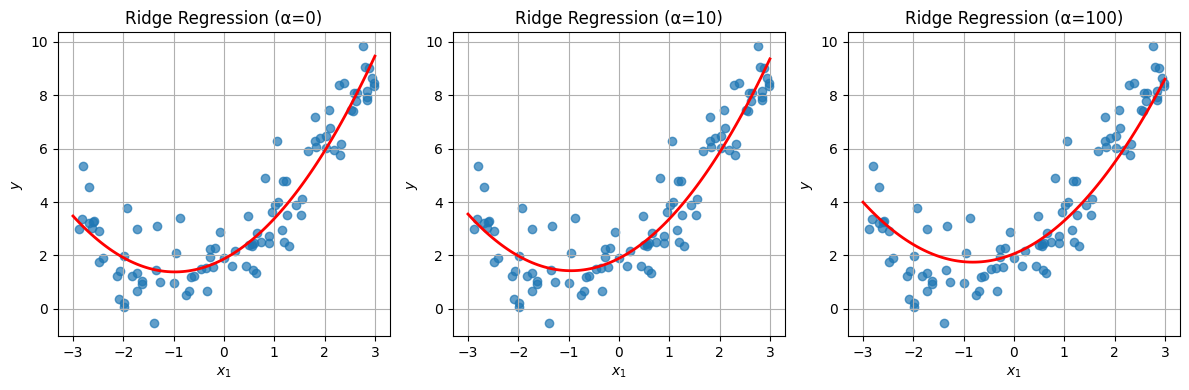

In [10]:
from sklearn.linear_model import Ridge

# Ridge regression with different alpha values
alphas = [0, 10, 100]
plt.figure(figsize=(12, 4))

for i, alpha in enumerate(alphas):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky", random_state=42)
    ridge_reg.fit(X_poly, y)

    y_new = ridge_reg.predict(X_new_poly)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, alpha=0.7)
    plt.plot(X_new, y_new, "r-", linewidth=2)
    plt.title(f"Ridge Regression (α={alpha})")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$")
    plt.grid(True)

plt.tight_layout()
plt.show()

# **12. Lasso Regression (L1 Regularization)**
---
Menambahkan regularization term αΣ|θᵢ| ke fungsi biaya. Cenderung menghasilkan sparse model.

Alpha=0.01: Coefficients = [0.99473622 0.51002388]
Alpha=0.1: Coefficients = [0.96867036 0.50084015]
Alpha=1: Coefficients = [0.70801175 0.40900283]


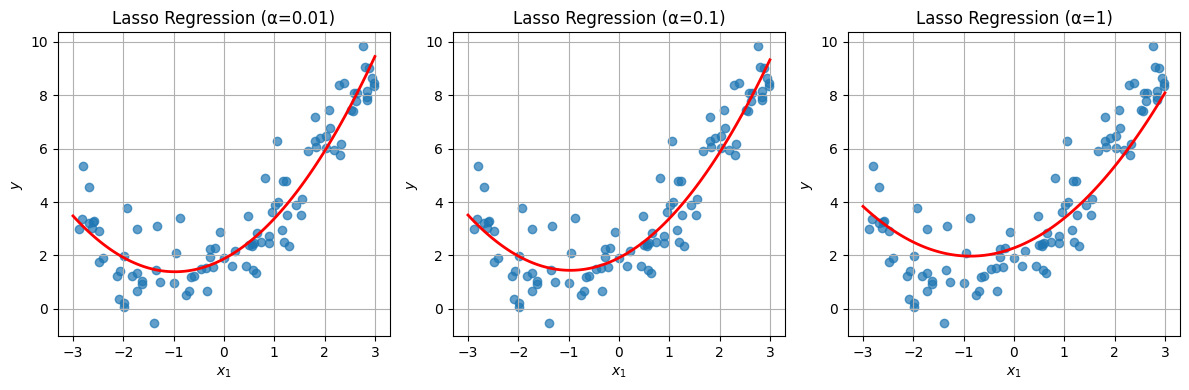

In [11]:
from sklearn.linear_model import Lasso

# Lasso regression with different alpha values
alphas = [0.01, 0.1, 1]
plt.figure(figsize=(12, 4))

for i, alpha in enumerate(alphas):
    lasso_reg = Lasso(alpha=alpha, max_iter=10000, random_state=42)
    lasso_reg.fit(X_poly, y)

    y_new = lasso_reg.predict(X_new_poly)

    plt.subplot(1, 3, i+1)
    plt.scatter(X, y, alpha=0.7)
    plt.plot(X_new, y_new, "r-", linewidth=2)
    plt.title(f"Lasso Regression (α={alpha})")
    plt.xlabel("$x_1$")
    plt.ylabel("$y$")
    plt.grid(True)
    print(f"Alpha={alpha}: Coefficients = {lasso_reg.coef_}")

plt.tight_layout()
plt.show()

# **13. Elastic Net**
---
Kombinasi Ridge dan Lasso regularization.

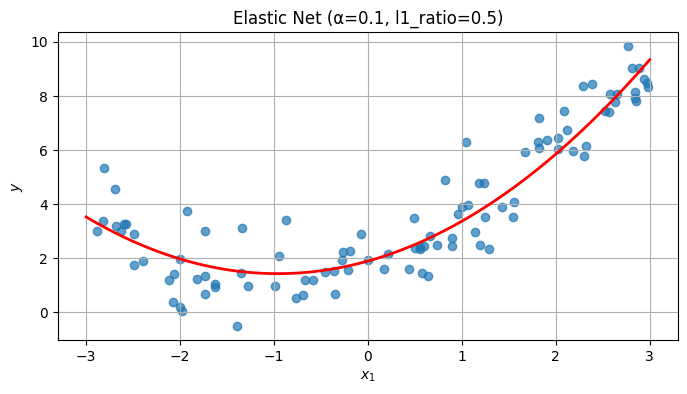

In [12]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_poly, y)

y_new = elastic_net.predict(X_new_poly)

plt.figure(figsize=(8, 4))
plt.scatter(X, y, alpha=0.7)
plt.plot(X_new, y_new, "r-", linewidth=2)
plt.title("Elastic Net (α=0.1, l1_ratio=0.5)")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()

# **14. Logistic Regression**
---
Untuk klasifikasi biner, mengestimasi probabilitas dengan fungsi sigmoid.

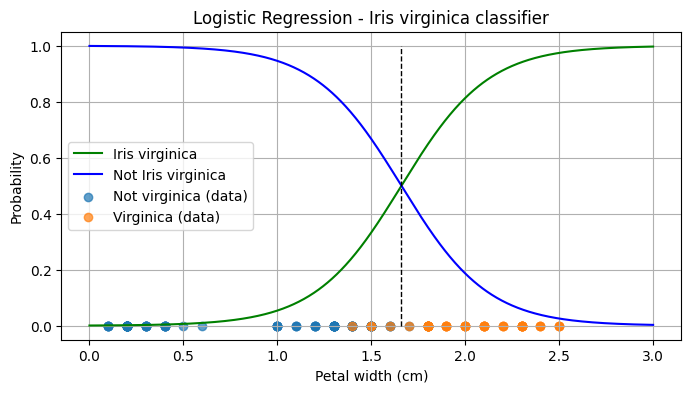

Decision boundary at petal width ≈ 1.66 cm
Predictions for petal width = 1.7 and 1.5:
[1 0]


In [13]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

# Load iris dataset
iris = datasets.load_iris()
X = iris["data"][:, 3:]  # petal width only
y = (iris["target"] == 2).astype(int)  # 1 if Iris virginica, else 0

# Train logistic regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

# Predict probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

# Plot probabilities
plt.figure(figsize=(8, 4))
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b-", label="Not Iris virginica")
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0, 1], "k--", linewidth=1)
plt.scatter(X[y==0], np.zeros(len(X[y==0])), alpha=0.7, label="Not virginica (data)")
plt.scatter(X[y==1], np.zeros(len(X[y==1])), alpha=0.7, label="Virginica (data)")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.title("Logistic Regression - Iris virginica classifier")
plt.legend(loc="center left")
plt.grid(True)
plt.show()

print(f"Decision boundary at petal width ≈ {decision_boundary[0]:.2f} cm")
print("Predictions for petal width = 1.7 and 1.5:")
print(log_reg.predict([[1.7], [1.5]]))

# **15. Softmax Regression (Multinomial Logistic Regression)**
---
Untuk klasifikasi multi-kelas.

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Prediction for [5, 2]: [2]
Probabilities for [5, 2]: [[6.21626374e-07 5.73689802e-02 9.42630398e-01]]


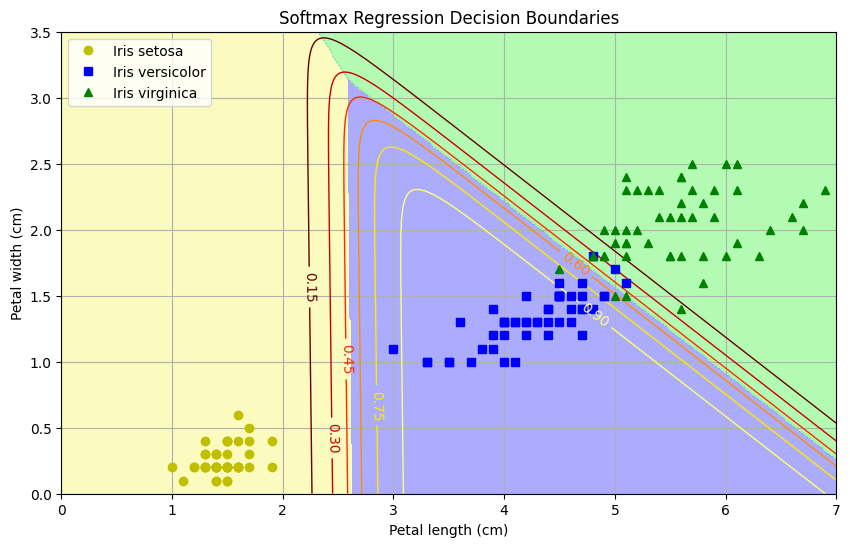

In [14]:
# Use two features: petal length and width
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

# Train Softmax Regression
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

# Make predictions
print("Prediction for [5, 2]:", softmax_reg.predict([[5, 2]]))
print("Probabilities for [5, 2]:", softmax_reg.predict_proba([[5, 2]]))

# Create mesh for decision boundaries
x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap, alpha=0.8)
contour = plt.contour(x0, x1, zz1, cmap="hot", linewidths=1)
plt.clabel(contour, inline=1, fontsize=10)

# Plot training data
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx], style, label=f"Iris {name}")

plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.title("Softmax Regression Decision Boundaries")
plt.legend(loc="upper left")
plt.axis([0, 7, 0, 3.5])
plt.grid(True)
plt.show()

# **16. Early Stopping**
---
Menghentikan training ketika validation error mencapai minimum.

Best epoch: 0
Minimum validation error: 13793081520.842712


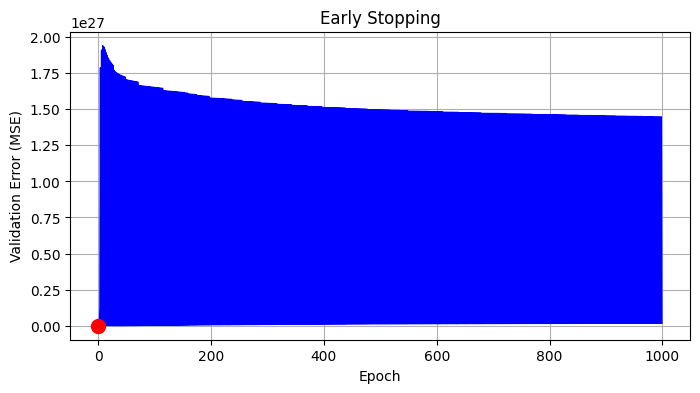

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.model_selection import train_test_split

# Prepare polynomial data
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

# Split data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Transform data
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

# SGD with early stopping
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, # Changed tol from -np.inf to None
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
val_errors = []

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    val_errors.append(val_error)

    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

print(f"Best epoch: {best_epoch}")
print(f"Minimum validation error: {minimum_val_error:.6f}")

# Plot validation error
plt.figure(figsize=(8, 4))
plt.plot(range(1000), val_errors, "b-", linewidth=1)
plt.plot([best_epoch, best_epoch], [0, minimum_val_error], "k--")
plt.scatter([best_epoch], [minimum_val_error], c="r", s=100, zorder=5)
plt.xlabel("Epoch")
plt.ylabel("Validation Error (MSE)")
plt.title("Early Stopping")
plt.grid(True)
# plt.axis([0, 1000, 0, 0.01]) # Removed this line to allow auto-scaling
plt.show()